In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import torch

In [2]:
t1fname = '/media/student1/NewVolume/MR_Reconstruction/EEML/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1.nii'
t2fname = '/media/student1/NewVolume/MR_Reconstruction/EEML/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t2.nii'
flfname = '/media/student1/NewVolume/MR_Reconstruction/EEML/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii'
segfname = '/media/student1/NewVolume/MR_Reconstruction/EEML/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii'
img_t1 = nib.load(t1fname).get_fdata()
img_t2 = nib.load(t2fname).get_fdata()
img_fl = nib.load(flfname).get_fdata()
img_seg = nib.load(segfname).get_fdata()
img_t1.shape , img_t2.shape , img_fl.shape , img_seg.shape

((240, 240, 155), (240, 240, 155), (240, 240, 155), (240, 240, 155))

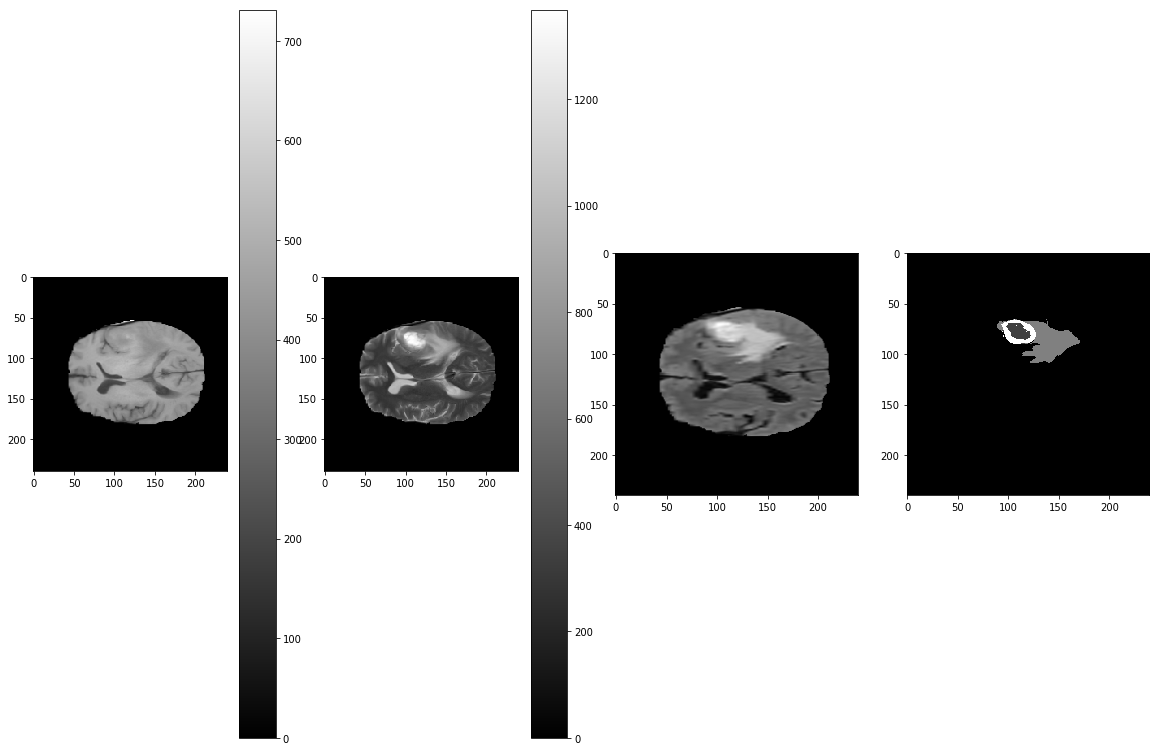

In [3]:
index = 80
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(img_t1[:,:,index],cmap='gray')
plt.colorbar()
plt.subplot(1,4,2)
plt.imshow(img_t2[:,:,index],cmap='gray')
plt.colorbar()
plt.subplot(1,4,3)
plt.imshow(img_fl[:,:,index],cmap='gray')
plt.subplot(1,4,4)
plt.imshow(img_seg[:,:,index],cmap='gray')

In [4]:
t1t2fl = np.stack((img_t1[:,:,index]/img_t1[:,:,index].max(),img_t2[:,:,index]/img_t2[:,:,index].max(),img_fl[:,:,index]/img_fl[:,:,index].max()),axis=0)
t1t2fl.shape

(3, 240, 240)

In [ ]:
np.save("/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Input/Images/t1t2fl.npy",t1t2fl)

In [5]:
img = np.load("/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Input/Images/t1t2fl.npy")
img.shape


(3, 240, 240)

In [6]:
img_t = torch.from_numpy(img)
img_t.shape

torch.Size([3, 240, 240])

In [7]:
img_np = img_t.numpy()
img_np.shape

(3, 240, 240)

In [ ]:
plt.imshow(img_t[0,:,:])
plt.colorbar()

In [91]:
img = np.load("/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1t2/gen_start_scale=0/5.npy")
img.shape


(1, 2, 240, 240)

Text(0.5,1,'t2_generated')

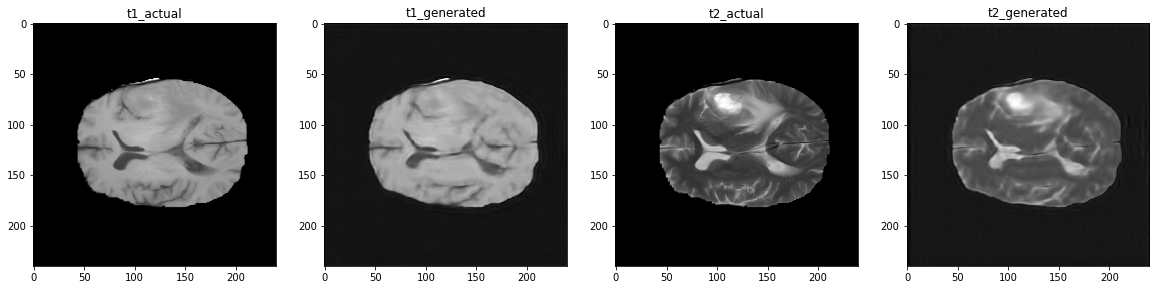

In [94]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(img_t1[:,:,index],cmap='gray')
plt.title('t1_actual')
plt.subplot(1,4,2)
plt.imshow(img[0,0,:,:],cmap='gray')
plt.title('t1_generated')
plt.subplot(1,4,3)
plt.imshow(img_t2[:,:,index],cmap='gray')
plt.title('t2_actual')
plt.subplot(1,4,4)
plt.imshow(img[0,1,:,:],cmap='gray')
plt.title('t2_generated')

# Input

(1, 3, 240, 240)


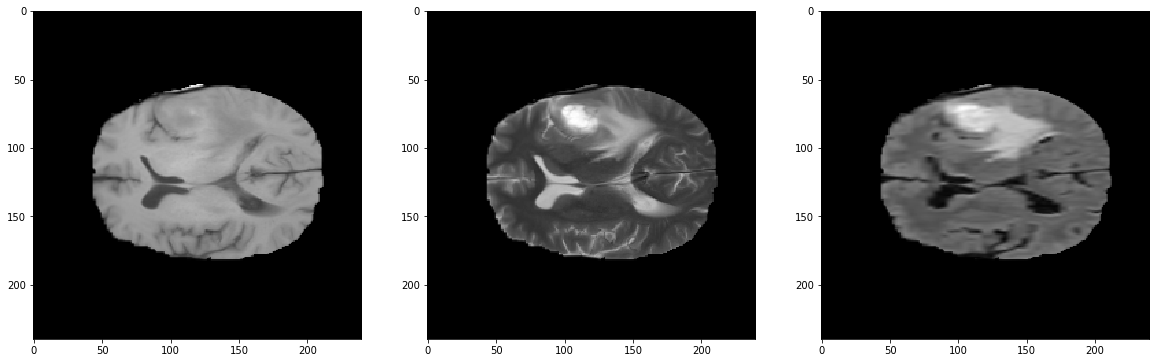

In [52]:
img = np.load("/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Input/Images/t1t2fl.npy")
print(img0.shape)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img[0,:,:],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img[1,:,:],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img[2,:,:],cmap='gray')

In [54]:
plt.imsave("/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Synthetic/t1.png",img[0,:,:],cmap='gray')
plt.imsave("/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Synthetic/t2.png",img[1,:,:],cmap='gray')
plt.imsave("/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Synthetic/fl.png",img[2,:,:],cmap='gray')

# Output 

(1, 3, 240, 240)


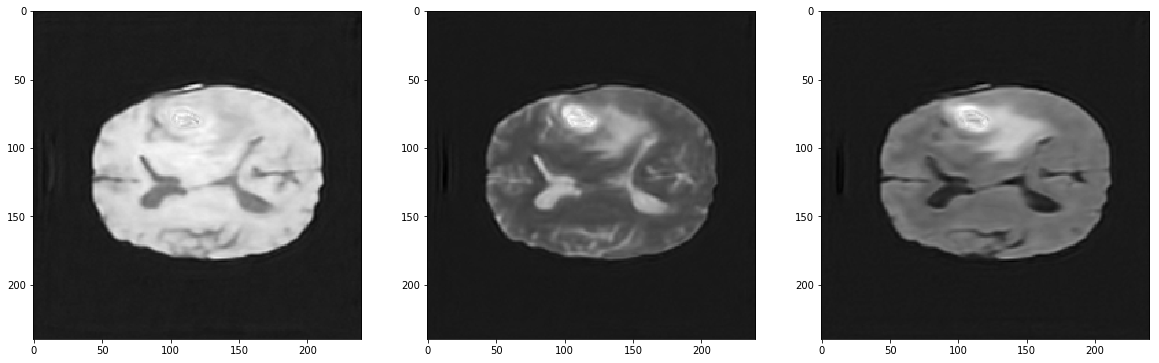

In [18]:
path = '/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1t2fl/gen_start_scale=0/'
img0 = np.load(path+'0.npy')
print(img0.shape)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img0[0,0,:,:],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img0[0,1,:,:],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img0[0,2,:,:],cmap='gray')

(1, 3, 240, 240)


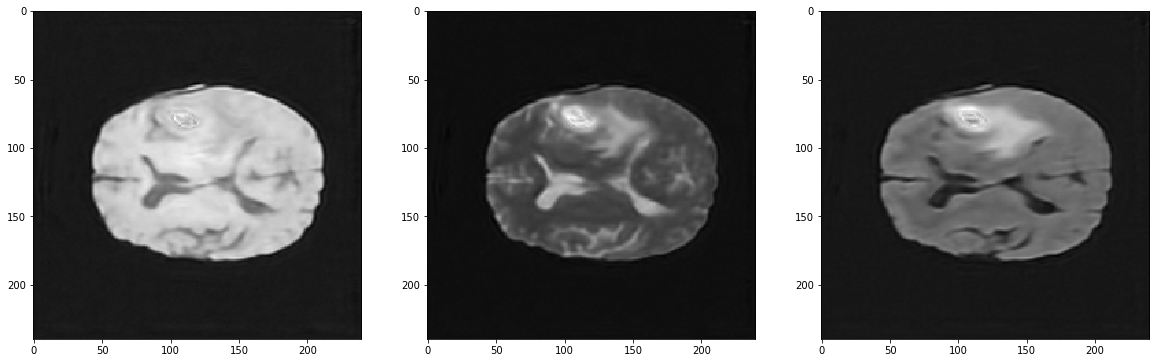

In [24]:
img1 = np.load(path+'1.npy')
print(img1.shape)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img1[0,0,:,:],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img1[0,1,:,:],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img1[0,2,:,:],cmap='gray')

(1, 3, 240, 240)


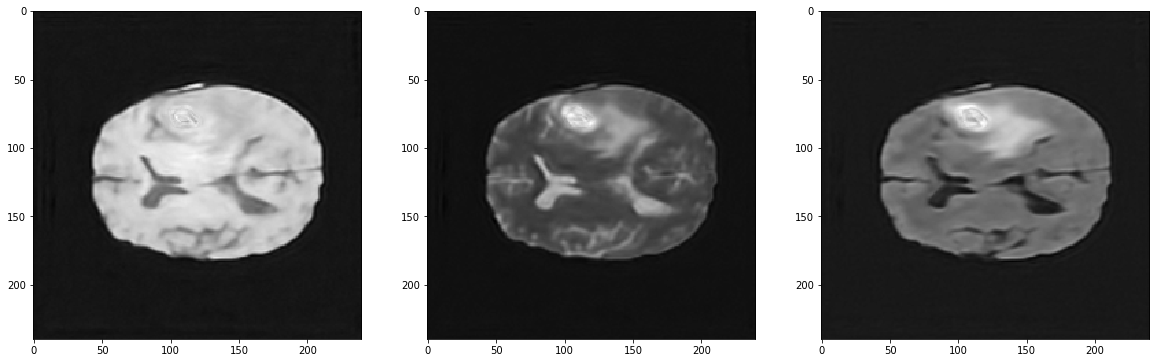

In [25]:
img2 = np.load(path+'2.npy')
print(img2.shape)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img2[0,0,:,:],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img2[0,1,:,:],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img2[0,2,:,:],cmap='gray')

(1, 3, 240, 240)


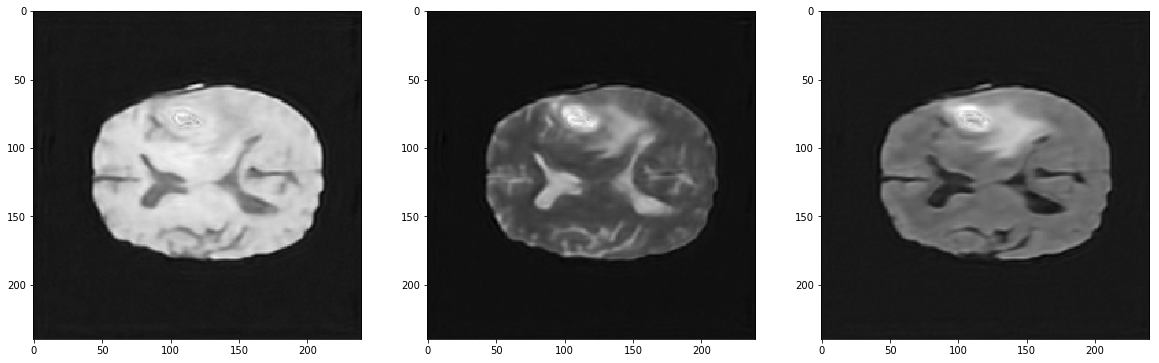

In [55]:
img2 = np.load(path+'9.npy')
print(img2.shape)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img2[0,0,:,:],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img2[0,1,:,:],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img2[0,2,:,:],cmap='gray')

# Saving as .png

In [58]:
import os
scale = 9
modality = "FL"
from tqdm import tqdm
for i in tqdm(range(50)):
    path = '/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1t2fl/gen_start_scale='+str(scale)+'/'
    img = np.load(path+str(i)+'.npy')
    folder = "/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Synthetic/scale_"+str(scale)+"/"+modality
    if not os.path.exists(folder):
        os.mkdir(folder)
    if modality=='T1':
        plt.imsave(folder+"/"+str(i)+".png",img[0,0,:,:],cmap='gray')
    elif modality=='T2':
        plt.imsave(folder+"/"+str(i)+".png",img[0,1,:,:],cmap='gray')
    elif modality=='FL':
        plt.imsave(folder+"/"+str(i)+".png",img[0,2,:,:],cmap='gray')
    
    

100%|██████████| 50/50 [00:00<00:00, 107.63it/s]


In [ ]:
from IPython.display import Image, display

listOfImageNames = ['/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1/gen_start_scale=0/10.png',
                    '/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1/gen_start_scale=0/20.png',
                   '/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1/gen_start_scale=0/30.png',
                   '/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1/gen_start_scale=0/40.png',
                   '/media/student1/NewVolume/MR_Reconstruction/EEML/SinGAN/Output/RandomSamples/t1/gen_start_scale=0/49.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [ ]:
plt.imsave('/media/student1/NewVolume/MR_Reconstruction/EEMLproject/SinGAN/t1t2.png', t1t2,cmap='gray')